<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB
None
Patient_ID         0
Age                0
Gender            21
Blood_Pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64


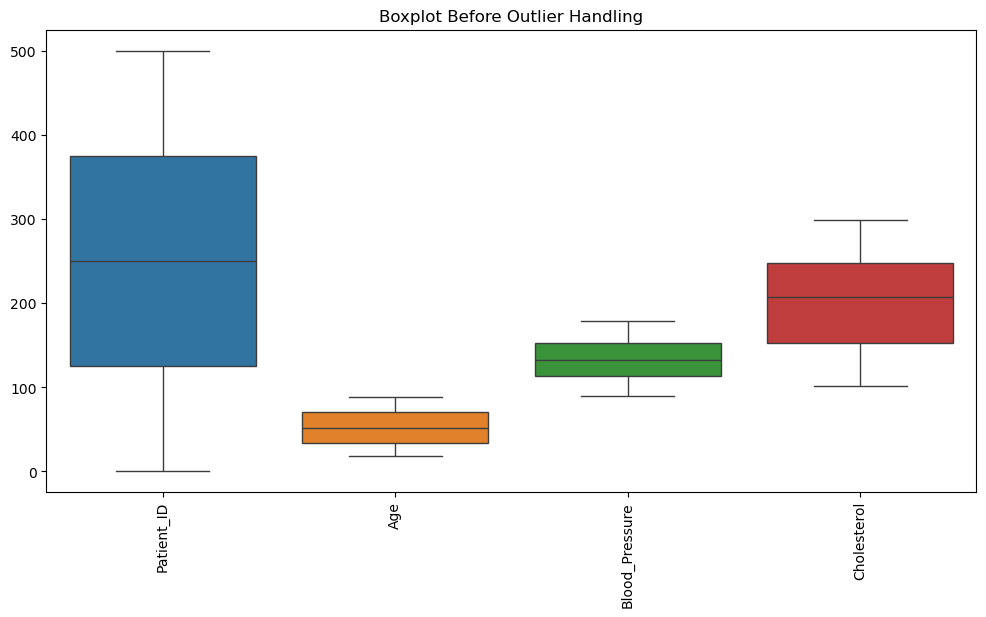

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      500 non-null    float64
 1   Age             500 non-null    float64
 2   Gender          500 non-null    int32  
 3   Blood_Pressure  500 non-null    float64
 4   Cholesterol     500 non-null    float64
 5   Diabetes        500 non-null    int32  
 6   Heart_Disease   500 non-null    int32  
dtypes: float64(4), int32(3)
memory usage: 25.4 KB
None
Patient_ID        0
Age               0
Gender            0
Blood_Pressure    0
Cholesterol       0
Diabetes          0
Heart_Disease     0
dtype: int64
0


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Load dataset (replace 'healthcare_data.csv' with actual filename)
df = pd.read_csv('Day_16_Healthcare_Data.csv')

# Handling Missing Data
print(df.info())
print(df.isna().sum())

# Impute missing values for numerical columns with median
for col in df.select_dtypes(include=["number"]):
    df[col].fillna(df[col].median(), inplace=True)

# Impute missing values for categorical columns with mode
for col in df.select_dtypes(include=["object"]):
    df[col].fillna(df[col].mode()[0], inplace=True)

# Detect and Handle Duplicates
df.drop_duplicates(inplace=True)

# Detect and Handle Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=["number"]))
plt.title("Boxplot Before Outlier Handling")
plt.xticks(rotation=90)
plt.show()

# Apply capping for outliers
for col in df.select_dtypes(include=["number"]):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Standardize and Normalize Data
scaler = MinMaxScaler()
df[df.select_dtypes(include=["number"]).columns] = scaler.fit_transform(df.select_dtypes(include=["number"]))

# Convert categorical variables into numerical representations
encoder = LabelEncoder()
for col in df.select_dtypes(include=["object"]):
    df[col] = encoder.fit_transform(df[col])

# Data Validation
print(df.info())
print(df.isna().sum())
print(df.duplicated().sum())

# Save cleaned dataset
df.to_csv('Day_16_Cleaned_Healthcare_Data.csv', index=False)
